In [11]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import netCDF4

import octant
import octant.roms

In [29]:
m = Basemap(llcrnrlon = -98,
            llcrnrlat = 22,
            urcrnrlon = -85,
            urcrnrlat = 32,
            projection='lcc',
            resolution = 'l',
            lat_0 = 30,
            lon_0 = -95)

nc = netCDF4.Dataset('http://barataria.tamu.edu:8080/thredds/dodsC/txla_nesting6/ocean_his_0123.nc')
ncg = netCDF4.Dataset('http://barataria.tamu.edu:8080/thredds/dodsC/txla_nesting6_grid/txla_grd_v4_new.nc')

lon_psi = ncg.variables['lon_psi'][:]
lat_psi = ncg.variables['lat_psi'][:]

x_psi, y_psi = m(lon_psi, lat_psi)

In [27]:
tidx = 69

salt = nc.variables['salt'][tidx]          # a snapshot of the 3D salinity field.
z = octant.roms.nc_depths(nc, 'rho')[tidx] # depths at the rho-points

<matplotlib.colorbar.Colorbar instance at 0x13b789b48>

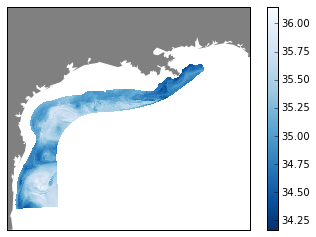

In [48]:
s50 = octant.tools.isoslice(salt,z,-50);        # s at z == -50
m.fillcontinents('0.5')
plt.pcolor(x_psi, y_psi, s50[1:-1, 1:-1], cmap=plt.cm.Blues_r)
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x163ce7d88>

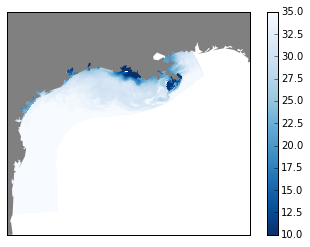

In [60]:
sss = salt[-1]     # surface salinity
m.fillcontinents('0.5')
plt.pcolor(x_psi, y_psi, sss[1:-1, 1:-1], cmap=plt.cm.Blues_r, vmin=10, vmax=35)
plt.colorbar()

In [72]:
t = netCDF4.num2date(nc.variables['ocean_time'][:], nc.variables['ocean_time'].units)
s = nc.variables['salt'][:, -1, 120, 400] 

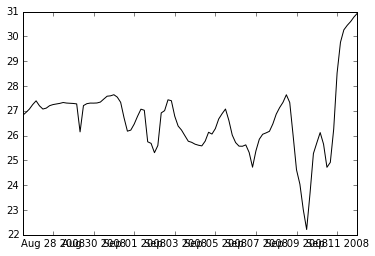

In [73]:
plt.plot_date(t, s, '-k')